In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("aptos_csv2.csv")

<AxesSubplot:xlabel='preço', ylabel='crawler'>

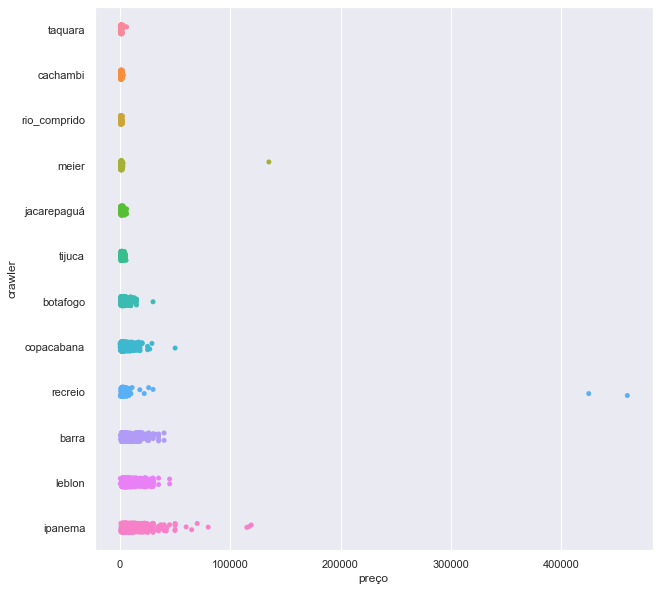

In [3]:
order = df[["crawler", "preço"]].groupby("crawler").mean().sort_values(by="preço").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="preço" , y="crawler", order=order)

In [4]:
def iqr(df):
    q1,q3 = df.quantile([.25 , .75])
    iqr= q3-q1
    lower_bound= q1 - 1.5*iqr
    upper_bound= q3 + 1.5*iqr
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(df)
    return lower_bound , upper_bound, round(pct_outliers,2)

def percentiles(df, percentiles_levels=0.1):
    lower_bound, upper_bound = df.quantile([percentile_level, 1-percentile_level])
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(df)
    return lower_bound, upper_bound, round(pct_outliers,2)

In [5]:
coluna = "preço"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>0.35:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
        print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
        df.loc[(df["crawler"]==bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan

<AxesSubplot:xlabel='preço', ylabel='crawler'>

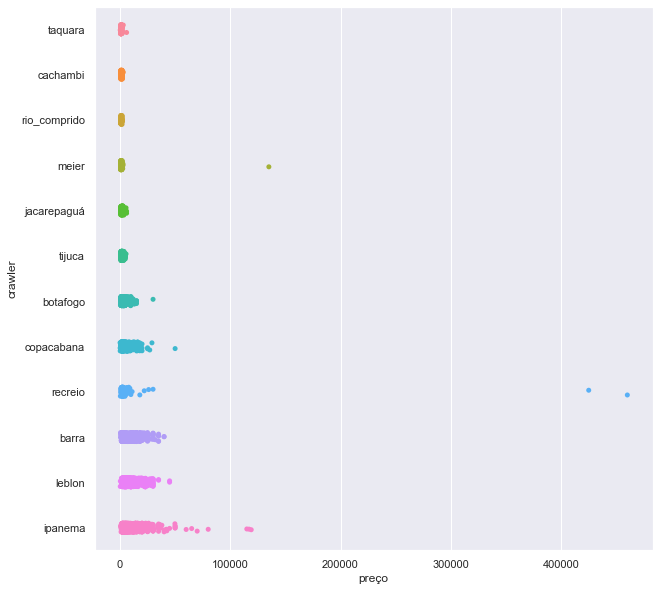

In [6]:
order = df[["crawler", "preço"]].groupby("crawler").mean().sort_values(by="preço").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, 
              x="preço", y="crawler", 
              order=order)

In [7]:
df.loc[df["preço"]>130000, "preço"]=np.nan

In [8]:
def plot_stripplot(df, var_name):
    order = df[["crawler", var_name]].groupby("crawler").mean().sort_values(by=var_name).index
    plt.figure(figsize=(10,10))
    return sns.stripplot(data=df, 
                         x=var_name, y="crawler", 
                         order=order)

<AxesSubplot:xlabel='area_limpo', ylabel='crawler'>

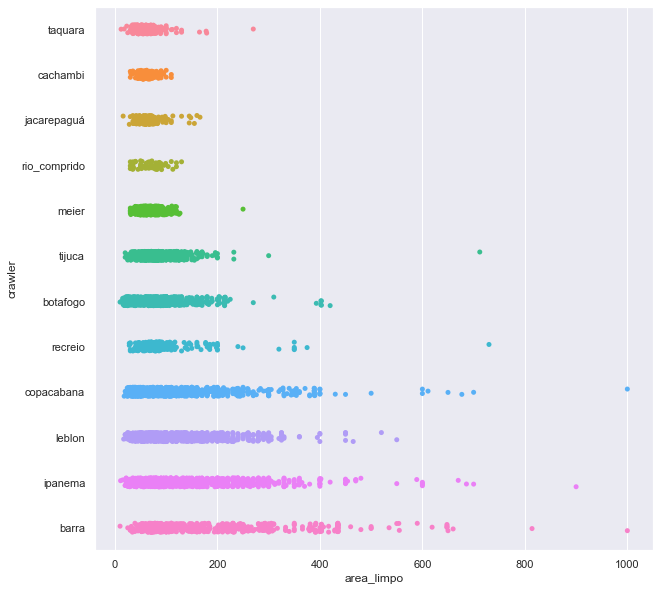

In [9]:
plot_stripplot(df, "area_limpo")

<AxesSubplot:xlabel='Quarto', ylabel='crawler'>

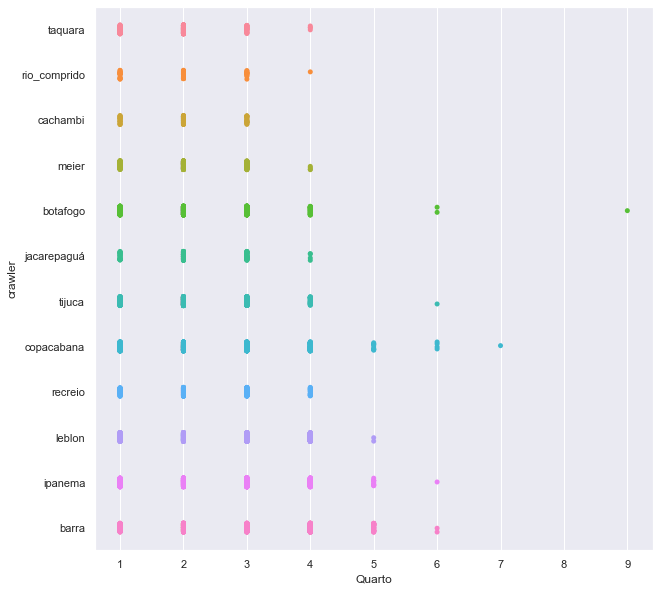

In [10]:
plot_stripplot(df, "Quarto")

In [11]:
df["Quarto"].value_counts(normalize=True)

2    0.388137
3    0.285344
1    0.198388
4    0.116326
5    0.010078
6    0.001440
7    0.000144
9    0.000144
Name: Quarto, dtype: float64

In [12]:
df.loc[df["Quarto"]>=7, "Quarto"]=np.nan

<AxesSubplot:xlabel='Quarto', ylabel='crawler'>

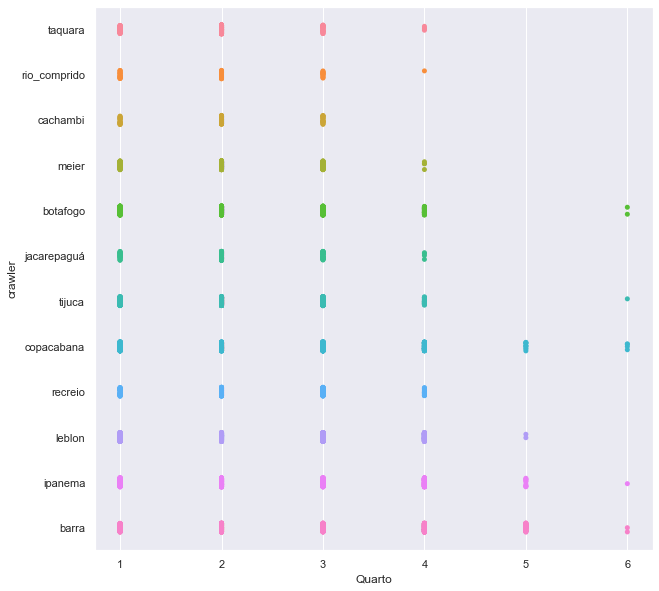

In [13]:
plot_stripplot(df, "Quarto")

<AxesSubplot:xlabel='Banheiro', ylabel='crawler'>

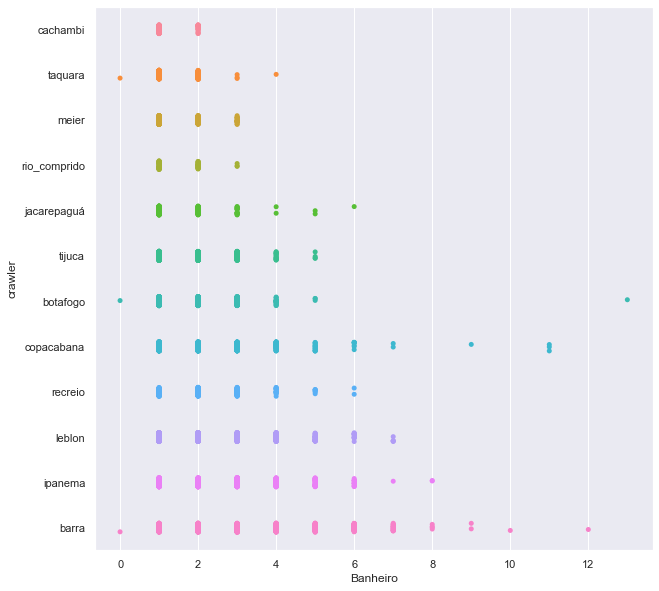

In [14]:
plot_stripplot(df, "Banheiro")

In [15]:
df["Banheiro"].value_counts(normalize=True)

1     0.423841
2     0.312698
3     0.156925
4     0.059315
5     0.026634
6     0.013821
7     0.004175
8     0.000864
11    0.000432
9     0.000432
0     0.000432
10    0.000144
13    0.000144
12    0.000144
Name: Banheiro, dtype: float64

In [16]:
df.loc[df["Banheiro"].isin([0,7,8,9,10,11,12,13]), "Banheiro"] = np.nan

<AxesSubplot:xlabel='Banheiro', ylabel='crawler'>

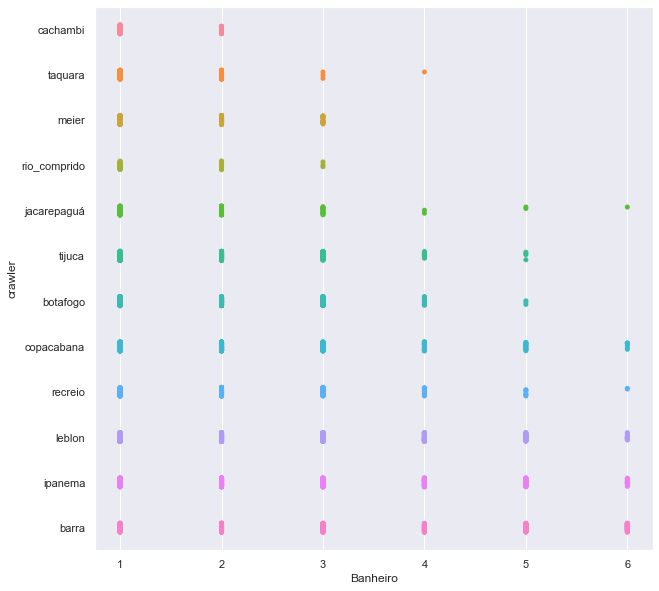

In [17]:
plot_stripplot(df, "Banheiro")

<AxesSubplot:xlabel='Garagem', ylabel='crawler'>

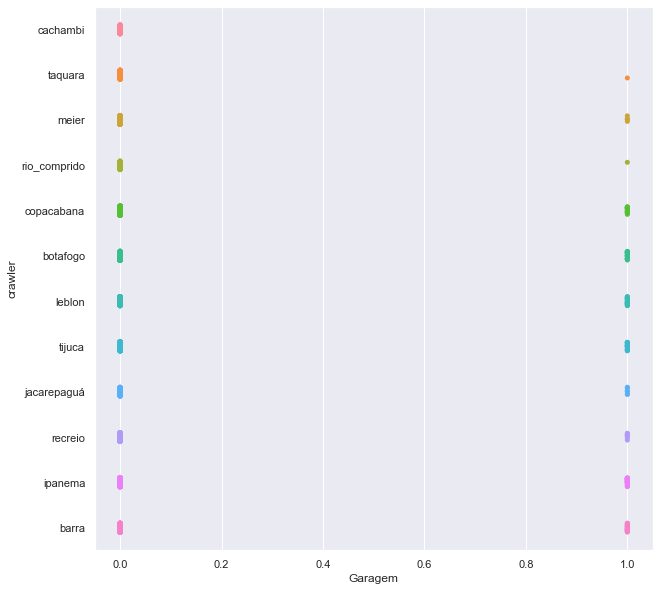

In [18]:
plot_stripplot(df, "Garagem")

In [19]:
df["Garagem"].value_counts()

0    6748
1     198
Name: Garagem, dtype: int64

<AxesSubplot:xlabel='condominio', ylabel='crawler'>

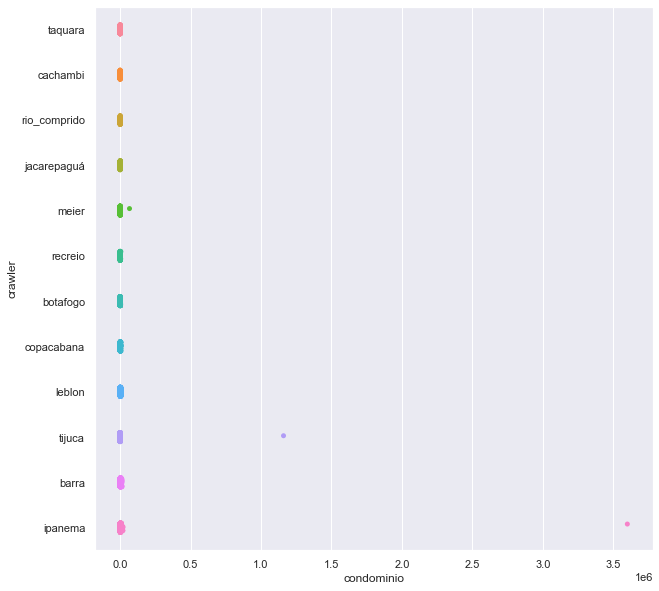

In [20]:
plot_stripplot(df, "condominio")

<AxesSubplot:ylabel='Frequency'>

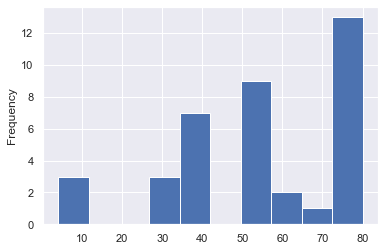

In [21]:
df.loc[df["condominio"]<100,"condominio"].plot(kind="hist")

In [22]:
df["condominio"].describe()

count    6.708000e+03
mean     2.246007e+03
std      4.618532e+04
min      4.000000e+00
25%      6.500000e+02
50%      1.050000e+03
75%      1.800000e+03
max      3.600000e+06
Name: condominio, dtype: float64

In [23]:
df.loc[df["condominio"]<=100, "condominio"]=np.nan

In [24]:
coluna = "condominio"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>0.35:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
        print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
        df.loc[(df["crawler"]==bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan

In [25]:
df["condominio"].describe()

count    6.645000e+03
mean     2.266617e+03
std      4.640329e+04
min      1.050000e+02
25%      6.500000e+02
50%      1.058000e+03
75%      1.805000e+03
max      3.600000e+06
Name: condominio, dtype: float64

<AxesSubplot:xlabel='condominio', ylabel='crawler'>

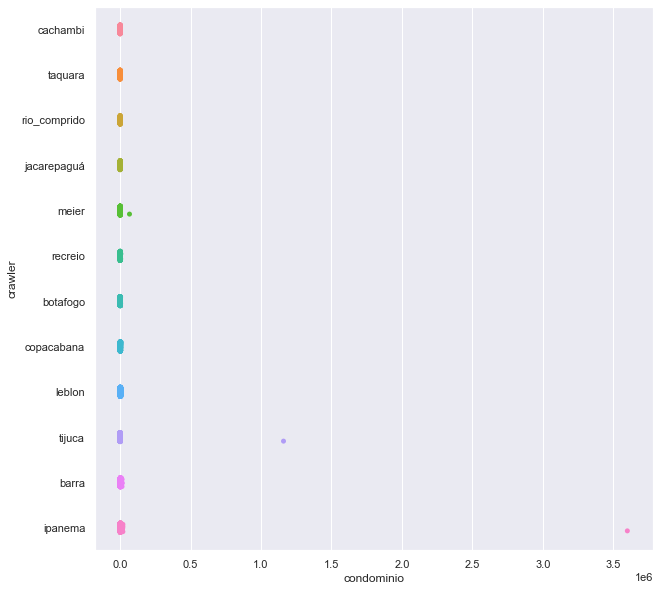

In [26]:
order = df[["crawler", "condominio"]].groupby("crawler").mean().sort_values(by="condominio").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="condominio" , y="crawler", order=order)

In [27]:
df.loc[df["condominio"]>=60000, "condominio"]=np.nan

<AxesSubplot:xlabel='condominio', ylabel='crawler'>

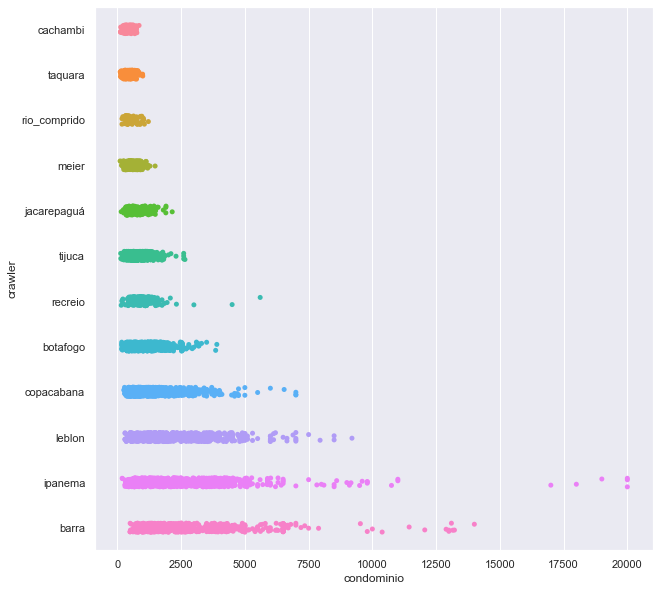

In [28]:
order = df[["crawler", "condominio"]].groupby("crawler").mean().sort_values(by="condominio").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, x="condominio" , y="crawler", order=order)

In [29]:
df = df.dropna(subset=["area_limpo","Banheiro", "Quarto","condominio", "Garagem", "preço"])

In [30]:
df = df.reset_index(drop=True)

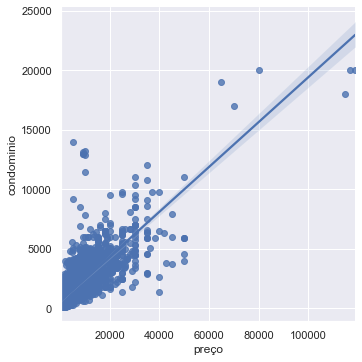

In [31]:
sns.lmplot(data=df, x="preço", y="condominio")

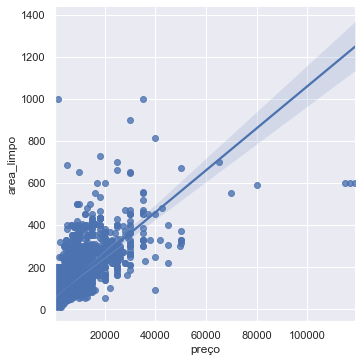

In [32]:
sns.lmplot(data=df, x="preço", y="area_limpo")

<AxesSubplot:>

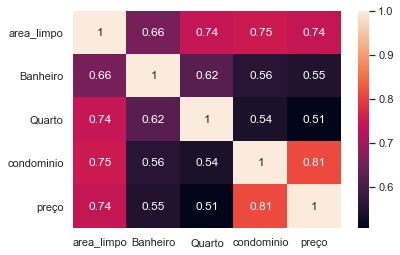

In [33]:
sns.heatmap(df[["area_limpo", "Banheiro", "Quarto", "condominio", "preço"]].corr(), annot=True)

In [34]:
df.to_csv("Aptos_sem_outliers.csv", index=False)